In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split


In [3]:
load_data = pd.read_excel("/content/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [4]:
load_data.describe()


,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [5]:
load_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fad1bfd7a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fad1bf61d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fad1bf79450>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fad1bf66f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fad1bfddd10>,
  <matplotlib.lines.Line2D at 0x7fad1bf615d0>]}

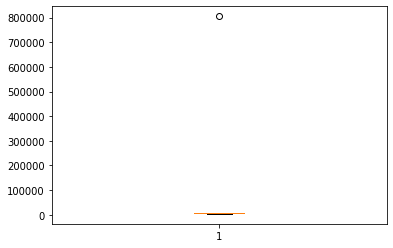

In [6]:
plt.boxplot(load_data.iloc[:,0])


In [7]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))


(array([928]),)


In [8]:


load_data.iloc[928,0] = load_data.iloc[927,0]



{'boxes': [<matplotlib.lines.Line2D at 0x7fad1b9dbf50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fad1b9e1fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fad1b9f0050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fad1b9e9ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fad1b9e1550>,
  <matplotlib.lines.Line2D at 0x7fad1b9e1a90>]}

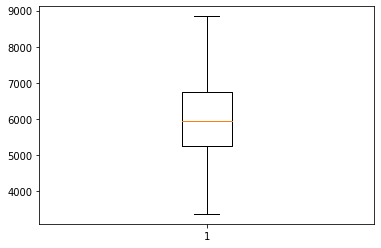

In [9]:
plt.boxplot(load_data.iloc[:,0])


In [10]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])


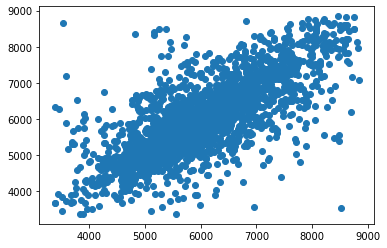

In [11]:
plt.scatter(x,y)


In [12]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)


In [13]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500


In [18]:
x = minmax_scale(x)
y = minmax_scale(y)



In [ ]:
data = []

for i in range(number_of_samples):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

